In [1]:
# 1) imports
import pandas as pd
import numpy as np

# 2) load the file
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# 3) quick look
print("rows, columns:", df.shape)
df.head()


rows, columns: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# see types and if any missing values
df.info()

# summary stats for numbers
df.describe().T

# check target distribution
print(df['Attrition'].value_counts())
print("Percent Attrition (Yes):", df['Attrition'].value_counts(normalize=True)['Yes']*100, "%")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
# drop columns that are IDs or the same for all rows
df = df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'], errors='ignore')

# remove duplicate rows (if any)
print("duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

# check missing values
print(df.isna().sum()[df.isna().sum() > 0])


duplicates: 0
Series([], dtype: int64)


In [4]:
# map Attrition Yes/No to 1/0
df['AttritionFlag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# drop original 'Attrition' column if you want
df = df.drop(columns=['Attrition'])


In [5]:
# add yearly income (more intuitive than monthly)
df['IncomePerYear'] = df['MonthlyIncome'] * 12

# create a simple tenure bucket (short, medium, long)
df['TenureGroup'] = pd.cut(df['YearsAtCompany'], bins=[-1,1,3,5,50], labels=['<1','1-3','3-5','5+'])


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,TenureGroup_1-3,TenureGroup_3-5,TenureGroup_5+
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,True,False,False,True,True,False,False,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,True,False,False,True,False,False,False,False,True
2,37,1373,2,2,4,92,2,1,3,2090,...,False,False,False,False,False,True,True,False,False,False
3,33,1392,3,4,4,56,3,1,3,2909,...,False,True,False,False,True,False,True,False,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,False,False,False,False,True,False,False,True,False,False


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("train shape:", X_train.shape, "test shape:", X_test.shape)
print("train positive rate:", y_train.mean(), "test positive rate:", y_test.mean())


train shape: (1176, 48) test shape: (294, 48)
train positive rate: 0.16156462585034015 test positive rate: 0.1598639455782313


In [10]:
from sklearn.preprocessing import StandardScaler

# find columns that are numeric
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [11]:
from sklearn.linear_model import LogisticRegression

# create and train
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
import pickle

# Save the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the list of column names used in training
with open("columns.pkl", "wb") as f:
    pickle.dump(X_train.columns, f)


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC (probability quality):", roc_auc_score(y_test, y_prob))


Classification report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       247
           1       0.40      0.72      0.51        47

    accuracy                           0.78       294
   macro avg       0.67      0.76      0.68       294
weighted avg       0.85      0.78      0.80       294

Confusion matrix:
[[195  52]
 [ 13  34]]
ROC AUC (probability quality): 0.816177103971057


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
import joblib

# 1. Identify categorical and numeric columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# 2. Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

# 3. Build pipeline
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=4, class_weight="balanced", random_state=42))
])

# 4. Train
pipe.fit(X_train, y_train)

# 5. Evaluate
y_pred = pipe.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# 6. Save pipeline model
joblib.dump(pipe, "attrition_model.pkl")


              precision    recall  f1-score   support

           0       0.89      0.64      0.75       247
           1       0.23      0.57      0.33        47

    accuracy                           0.63       294
   macro avg       0.56      0.61      0.54       294
weighted avg       0.78      0.63      0.68       294



['attrition_model.pkl']

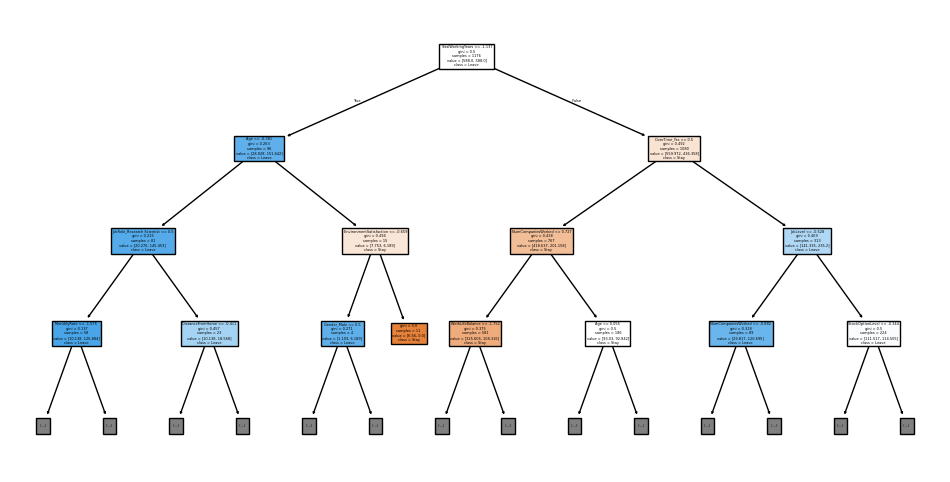

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
tree.plot_tree(dt, feature_names=X_train.columns, class_names=['Stay','Leave'], filled=True, max_depth=3)
plt.show()


In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After :", np.bincount(y_train_res))


Before: AttritionFlag
0    986
1    190
Name: count, dtype: int64
After : [986 986]


In [16]:
dt2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt2.fit(X_train_res, y_train_res)
print(classification_report(y_test, dt2.predict(X_test)))


              precision    recall  f1-score   support

           0       0.88      0.85      0.87       247
           1       0.33      0.38      0.36        47

    accuracy                           0.78       294
   macro avg       0.61      0.62      0.61       294
weighted avg       0.79      0.78      0.78       294



In [17]:
feat_imp = pd.Series(dt2.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feat_imp.head(10))


OverTime_Yes                        0.352808
StockOptionLevel                    0.125937
JobLevel                            0.120789
TotalWorkingYears                   0.116475
BusinessTravel_Travel_Rarely        0.080641
BusinessTravel_Travel_Frequently    0.040803
WorkLifeBalance                     0.034656
NumCompaniesWorked                  0.029671
Age                                 0.022974
JobRole_Laboratory Technician       0.022783
dtype: float64


In [18]:
import joblib
joblib.dump(dt2, 'attrition_model.pkl')
# later load with:
# model = joblib.load('attrition_model.pkl')


['attrition_model.pkl']

In [21]:
import joblib
joblib.dump(pipe, "attrition_model.pkl")


['attrition_model.pkl']

In [24]:
import pickle

# assuming your final pipeline/model is named "model"
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
